In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np 
import h5py

In [13]:
catfile='/global/cscratch1/sd/danielsf/cosmodc2_colors/mags_by_mass_w_rest.h5'
hf = h5py.File(catfile, 'r')
print(list(hf.keys()))

['g_10', 'g_11', 'g_5', 'g_6', 'g_7', 'g_8', 'g_9', 'g_fixed_10', 'g_fixed_11', 'g_fixed_5', 'g_fixed_6', 'g_fixed_7', 'g_fixed_8', 'g_fixed_9', 'g_rest_10', 'g_rest_11', 'g_rest_5', 'g_rest_6', 'g_rest_7', 'g_rest_8', 'g_rest_9', 'galaxy_id_10', 'galaxy_id_11', 'galaxy_id_5', 'galaxy_id_6', 'galaxy_id_7', 'galaxy_id_8', 'galaxy_id_9', 'i_10', 'i_11', 'i_5', 'i_6', 'i_7', 'i_8', 'i_9', 'i_fixed_10', 'i_fixed_11', 'i_fixed_5', 'i_fixed_6', 'i_fixed_7', 'i_fixed_8', 'i_fixed_9', 'i_rest_10', 'i_rest_11', 'i_rest_5', 'i_rest_6', 'i_rest_7', 'i_rest_8', 'i_rest_9', 'r_10', 'r_11', 'r_5', 'r_6', 'r_7', 'r_8', 'r_9', 'r_fixed_10', 'r_fixed_11', 'r_fixed_5', 'r_fixed_6', 'r_fixed_7', 'r_fixed_8', 'r_fixed_9', 'r_rest_10', 'r_rest_11', 'r_rest_5', 'r_rest_6', 'r_rest_7', 'r_rest_8', 'r_rest_9', 'u_10', 'u_11', 'u_5', 'u_6', 'u_7', 'u_8', 'u_9', 'u_fixed_10', 'u_fixed_11', 'u_fixed_5', 'u_fixed_6', 'u_fixed_7', 'u_fixed_8', 'u_fixed_9', 'u_rest_10', 'u_rest_11', 'u_rest_5', 'u_rest_6', 'u_rest_

In [14]:
import sys
import numpy as np
sys.path.insert(0, '/global/u1/k/kovacs/gcr-catalogs_master')
import GCRCatalogs
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.0_10451')
gc.cosmology

FlatLambdaCDM(H0=71 km / (Mpc s), Om0=0.265, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=0.0448)

In [15]:
keys = gc.list_all_quantities()
lsst_keys = [k for k in keys if 'lsst' in k and 'no_host' in k]
print(lsst_keys)
SED_keys = [k for k in keys if 'sed' in k and 'bulge' not in k and 'disk' not in k]
print(sorted(SED_keys))
sm = [k for k in keys if 'mass' in k]
print(sm)
#all_keys = gc.list_all_native_quantities()
#sfr_keys = [k for k in all_keys if 'StarFormationRate' in k or 'sfr' in k or 'SFR' in k]
#print(sfr_keys)

['mag_true_r_lsst_no_host_extinction', 'Mag_true_g_lsst_z0_no_host_extinction', 'mag_u_lsst_no_host_extinction', 'mag_true_g_lsst_no_host_extinction', 'mag_g_lsst_no_host_extinction', 'mag_Y_lsst_no_host_extinction', 'mag_true_u_lsst_no_host_extinction', 'Mag_true_Y_lsst_z0_no_host_extinction', 'mag_y_lsst_no_host_extinction', 'Mag_true_r_lsst_z0_no_host_extinction', 'mag_i_lsst_no_host_extinction', 'mag_r_lsst_no_host_extinction', 'Mag_true_z_lsst_z0_no_host_extinction', 'mag_true_y_lsst_no_host_extinction', 'mag_true_z_lsst_no_host_extinction', 'Mag_true_u_lsst_z0_no_host_extinction', 'mag_true_i_lsst_no_host_extinction', 'Mag_true_i_lsst_z0_no_host_extinction', 'mag_z_lsst_no_host_extinction', 'mag_true_Y_lsst_no_host_extinction', 'Mag_true_y_lsst_z0_no_host_extinction']
['sed_1000_246', 'sed_1000_246_no_host_extinction', 'sed_11467_1710', 'sed_11467_1710_no_host_extinction', 'sed_1246_306', 'sed_1246_306_no_host_extinction', 'sed_13177_1966', 'sed_13177_1966_no_host_extinction', 's

In [16]:
quantities = ['galaxy_id', 'redshift', 'redshift_true'] + lsst_keys
cosmodc2 = gc.get_quantities(quantities)
print(len(cosmodc2['galaxy_id']))

17232961


In [6]:
cosmodc2['distmod'] = gc.cosmology.distmod(cosmodc2['redshift_true']) #check
print(cosmodc2['distmod'][0:10])

[ 34.07289728  35.07730224  34.96070093  34.94156741  34.94824558
  34.45117144  34.45117144  34.45117144  34.45117144  33.70483001] mag


In [7]:
logm = 10
catkeys = list(hf.keys())
gal_id = 'galaxy_id_{}'.format(str(logm))
sort_idx = cosmodc2['galaxy_id'].argsort()
matches = sort_idx[np.searchsorted(cosmodc2['galaxy_id'], hf[gal_id].value, sorter = sort_idx)]
print(len(matches), cosmodc2['galaxy_id'][matches[0:5]], hf[gal_id].value[0:5] )

50000 [14025974561 14048725707 14200464043 14085796465 14001349621] [14025974561 14048725707 14200464043 14085796465 14001349621]


In [8]:
def get_colors(bands, color_dict, key_template):
    for b1, b2 in zip(bands[0:-1], bands[1:]):
        k1 = key_template.format(b1)
        k2 = key_template.format(b2)
        color_dict[b1+'-'+b2] = color_dict[k1] - color_dict[k2]

    return color_dict

In [9]:
def get_catsim_dict(hf, logmass, key_template, bands):
    catsim={}
    for logm in logmass:
        catsim[str(logm)] = {}
        for band in bands:
            cs_key = catsim_template.format(band, str(logm))
            catsim[str(logm)][band] = hf[cs_key].value
        
    return catsim

In [10]:
logmass = [6, 7, 8, 9, 10, 11]
bands = ['u', 'g', 'r', 'i', 'z', 'y']
catsim_template = '{}_rest_{}'
cosmodc2_Mtemplate = 'Mag_true_{}_lsst_z0_no_host_extinction'
#cosmodc2_mtemplate = 'mag_true_{}_lsst_no_host_extinction'
catsim = get_catsim_dict(hf, logmass, catsim_template, bands)
cosmodc2 = get_colors(bands, cosmodc2, cosmodc2_Mtemplate)

for logm in logmass:
    catsim[str(logm)] = get_colors(bands, catsim[str(logm)], '{}')
    print(logm, list(catsim[str(logm)].keys()))

6 ['u', 'g', 'r', 'i', 'z', 'y', 'u-g', 'g-r', 'r-i', 'i-z', 'z-y']
7 ['u', 'g', 'r', 'i', 'z', 'y', 'u-g', 'g-r', 'r-i', 'i-z', 'z-y']
8 ['u', 'g', 'r', 'i', 'z', 'y', 'u-g', 'g-r', 'r-i', 'i-z', 'z-y']
9 ['u', 'g', 'r', 'i', 'z', 'y', 'u-g', 'g-r', 'r-i', 'i-z', 'z-y']
10 ['u', 'g', 'r', 'i', 'z', 'y', 'u-g', 'g-r', 'r-i', 'i-z', 'z-y']
11 ['u', 'g', 'r', 'i', 'z', 'y', 'u-g', 'g-r', 'r-i', 'i-z', 'z-y']


50000 [14119576539 14319626758 14013306037] [14119576539 14319626758 14013306037]
# in z bin = 1460
Saving mag_check_logM_8_z_0.0_0.5.png
Saving delta_mag_logM_8_z_0.0_0.5.png
Saving color_check_logM_8_z_0.0_0.5.png
Saving delta_color_logM_8_z_0.0_0.5.png
Saving color_color_check_logM_8_z_0.0_0.5.png
# in z bin = 6161
Saving mag_check_logM_8_z_0.5_1.0.png
Saving delta_mag_logM_8_z_0.5_1.0.png
Saving color_check_logM_8_z_0.5_1.0.png
Saving delta_color_logM_8_z_0.5_1.0.png
Saving color_color_check_logM_8_z_0.5_1.0.png
# in z bin = 9829
Saving mag_check_logM_8_z_1.0_1.5.png
Saving delta_mag_logM_8_z_1.0_1.5.png
Saving color_check_logM_8_z_1.0_1.5.png
Saving delta_color_logM_8_z_1.0_1.5.png
Saving color_color_check_logM_8_z_1.0_1.5.png
# in z bin = 11473
Saving mag_check_logM_8_z_1.5_2.0.png
Saving delta_mag_logM_8_z_1.5_2.0.png
Saving color_check_logM_8_z_1.5_2.0.png
Saving delta_color_logM_8_z_1.5_2.0.png
Saving color_color_check_logM_8_z_1.5_2.0.png
50000 [14118945171 14282720847 140579

/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Saving mag_check_logM_9_z_0.0_0.5.png
Saving delta_mag_logM_9_z_0.0_0.5.png
Saving color_check_logM_9_z_0.0_0.5.png
Saving delta_color_logM_9_z_0.0_0.5.png
Saving color_color_check_logM_9_z_0.0_0.5.png
# in z bin = 7453
Saving mag_check_logM_9_z_0.5_1.0.png
Saving delta_mag_logM_9_z_0.5_1.0.png
Saving color_check_logM_9_z_0.5_1.0.png
Saving delta_color_logM_9_z_0.5_1.0.png
Saving color_color_check_logM_9_z_0.5_1.0.png
# in z bin = 10321
Saving mag_check_logM_9_z_1.0_1.5.png
Saving delta_mag_logM_9_z_1.0_1.5.png
Saving color_check_logM_9_z_1.0_1.5.png
Saving delta_color_logM_9_z_1.0_1.5.png
Saving color_color_check_logM_9_z_1.0_1.5.png
# in z bin = 11547
Saving mag_check_logM_9_z_1.5_2.0.png
Saving delta_mag_logM_9_z_1.5_2.0.png
Saving color_check_logM_9_z_1.5_2.0.png
Saving delta_color_logM_9_z_1.5_2.0.png
Saving color_color_check_logM_9_z_1.5_2.0.png
50000 [14025974561 14048725707 14200464043] [14025974561 14048725707 14200464043]
# in z bin = 3792
Saving mag_check_logM_10_z_0.0_0.5.p

/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


Saving color_color_check_logM_10_z_1.0_1.5.png
# in z bin = 10008
Saving mag_check_logM_10_z_1.5_2.0.png
Saving delta_mag_logM_10_z_1.5_2.0.png
Saving color_check_logM_10_z_1.5_2.0.png
Saving delta_color_logM_10_z_1.5_2.0.png
Saving color_color_check_logM_10_z_1.5_2.0.png
11095 [14000000422 14000000879 14000001213] [14000000422 14000000879 14000001213]
# in z bin = 896
Saving mag_check_logM_11_z_0.0_0.5.png
Saving delta_mag_logM_11_z_0.0_0.5.png
Saving color_check_logM_11_z_0.0_0.5.png
Saving delta_color_logM_11_z_0.0_0.5.png
Saving color_color_check_logM_11_z_0.0_0.5.png
# in z bin = 2915
Saving mag_check_logM_11_z_0.5_1.0.png
Saving delta_mag_logM_11_z_0.5_1.0.png
Saving color_check_logM_11_z_0.5_1.0.png
Saving delta_color_logM_11_z_0.5_1.0.png
Saving color_color_check_logM_11_z_0.5_1.0.png
# in z bin = 2904
Saving mag_check_logM_11_z_1.0_1.5.png
Saving delta_mag_logM_11_z_1.0_1.5.png
Saving color_check_logM_11_z_1.0_1.5.png
Saving delta_color_logM_11_z_1.0_1.5.png
Saving color_color

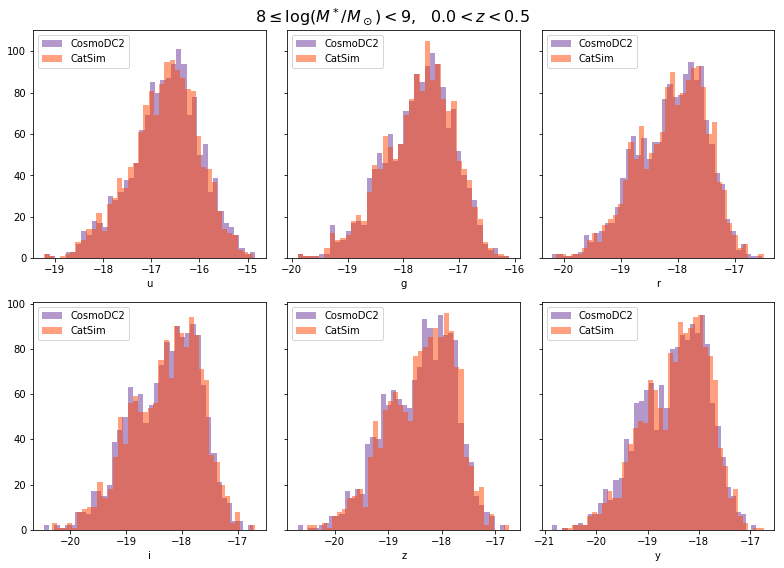

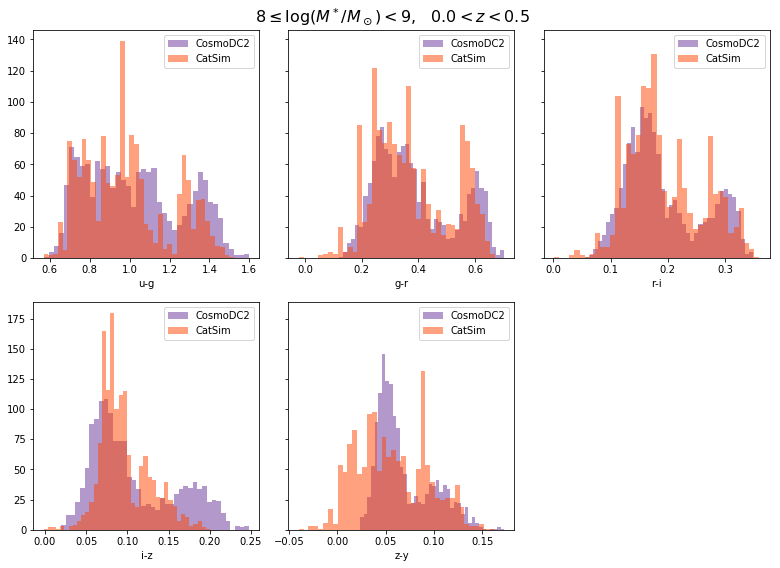

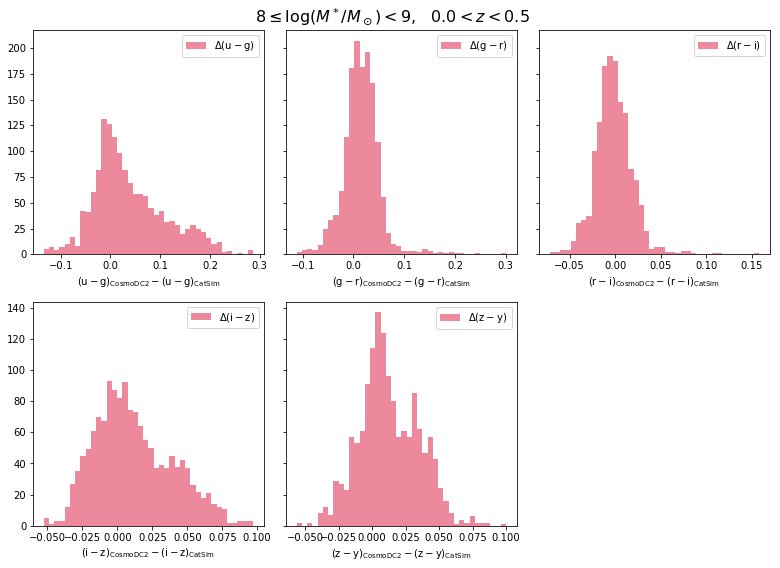

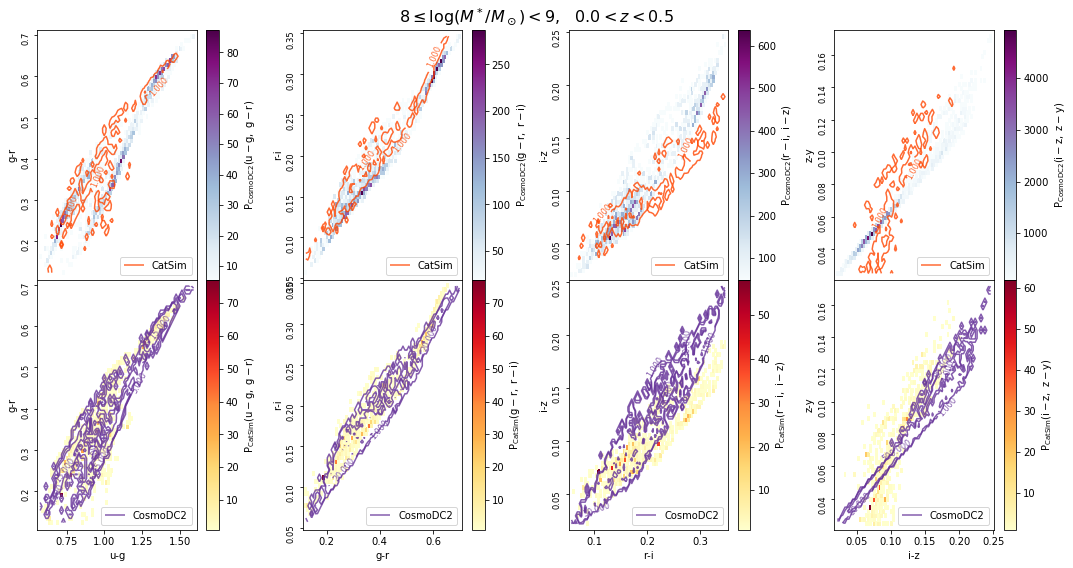

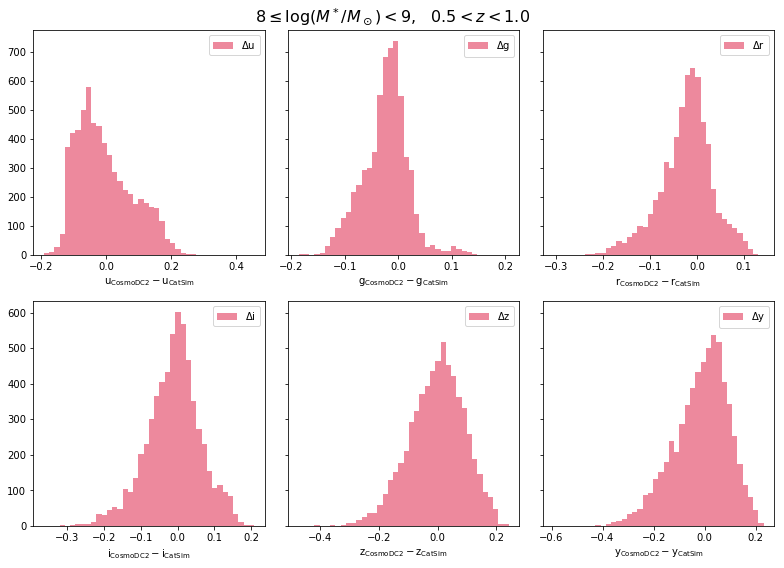

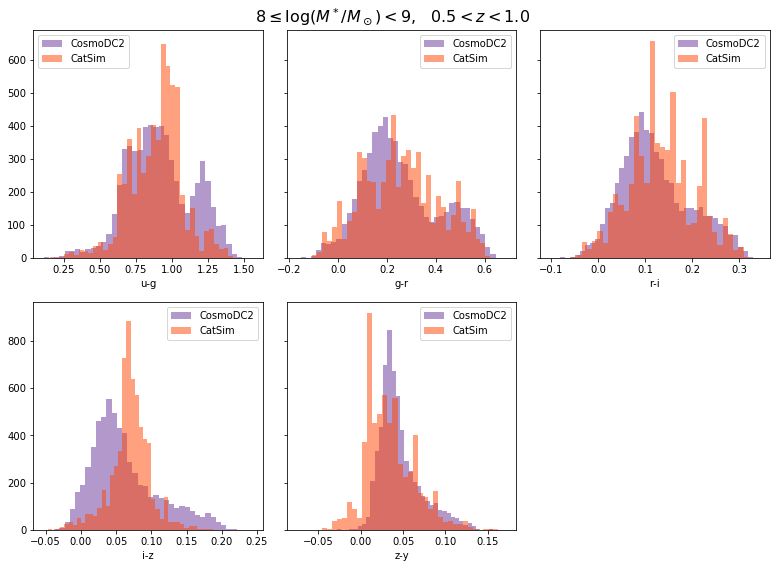

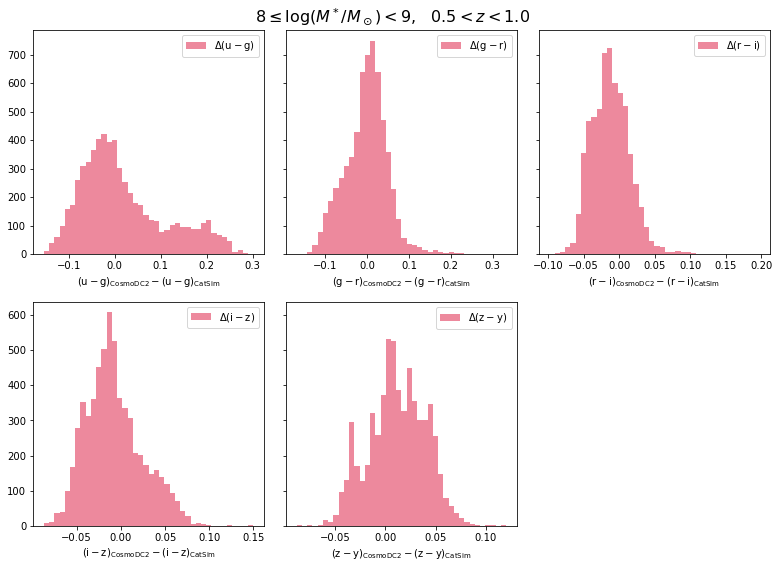

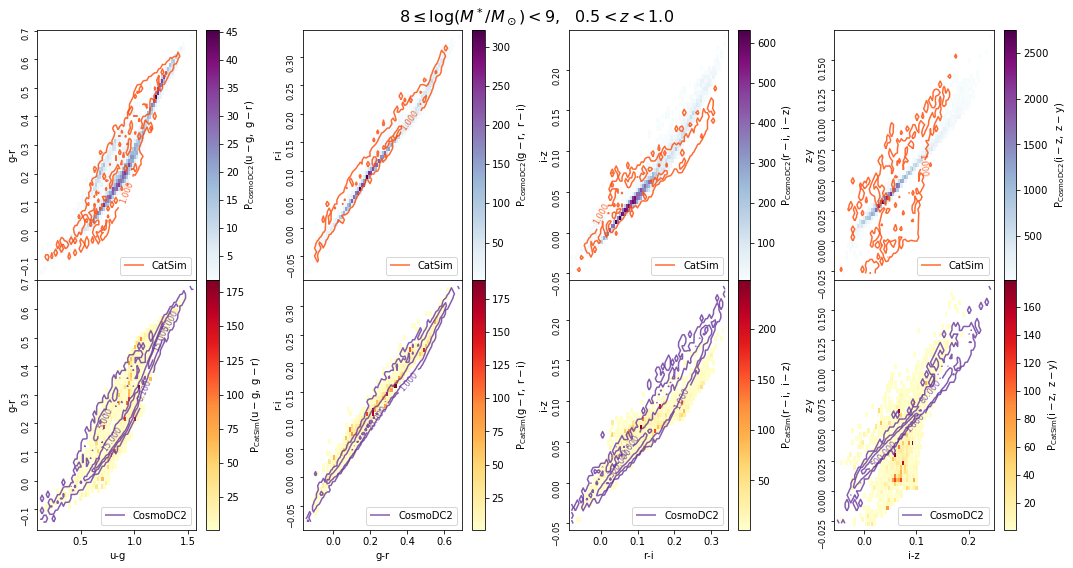

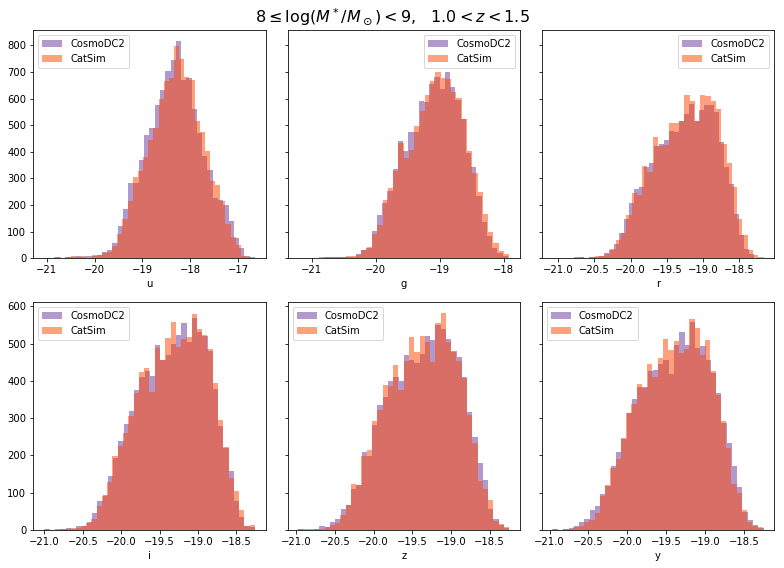

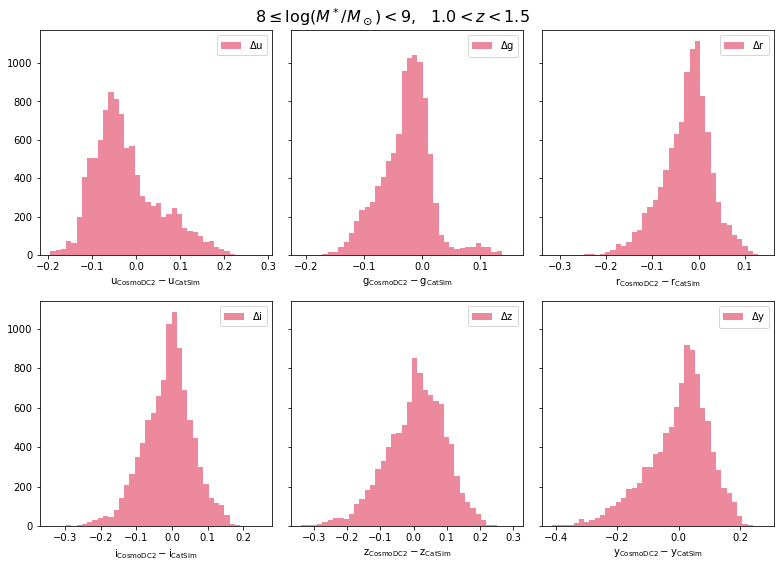

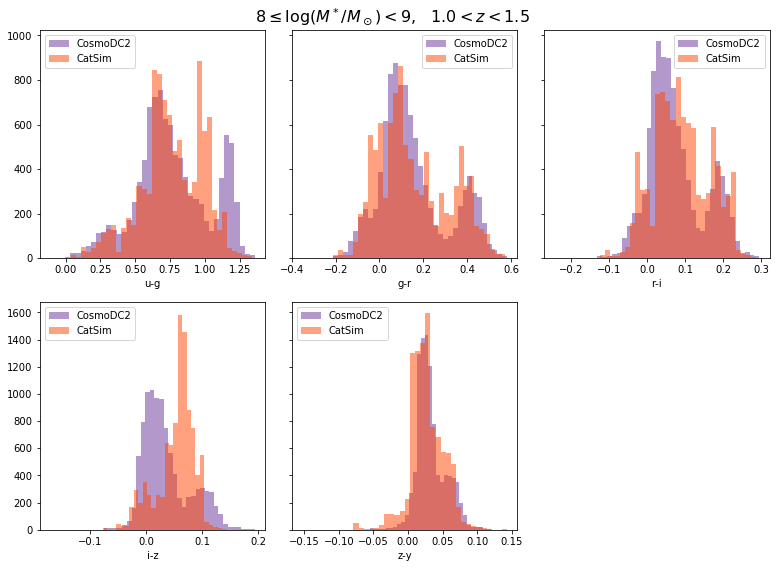

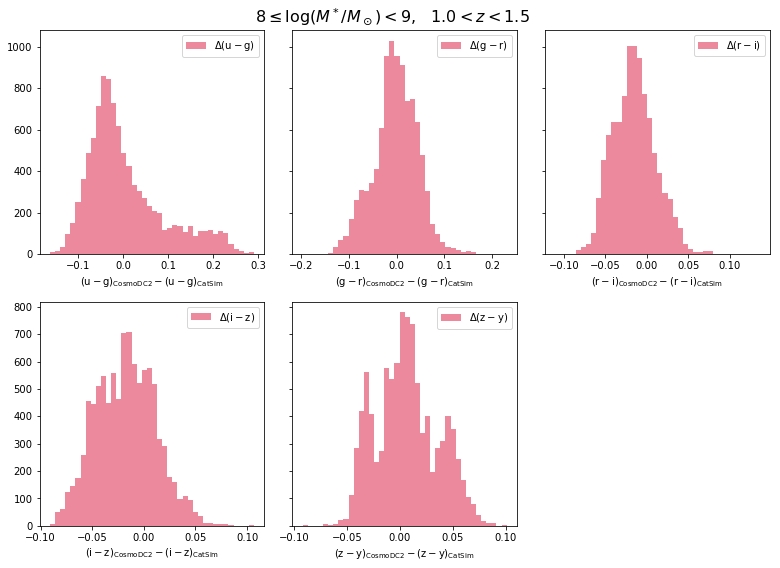

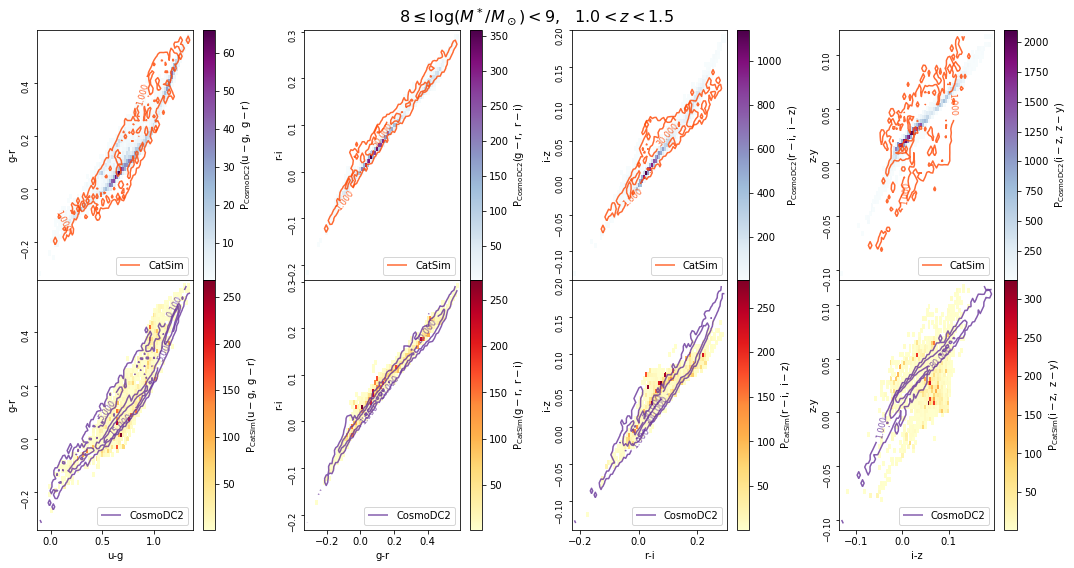

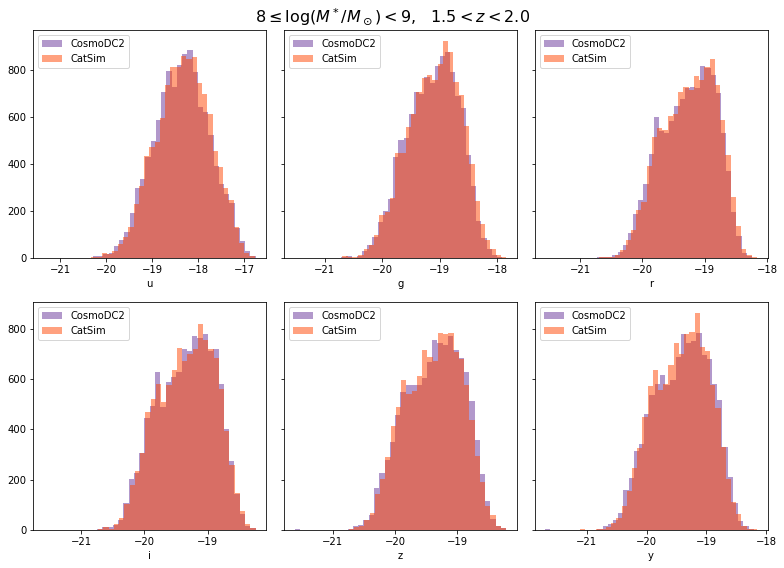

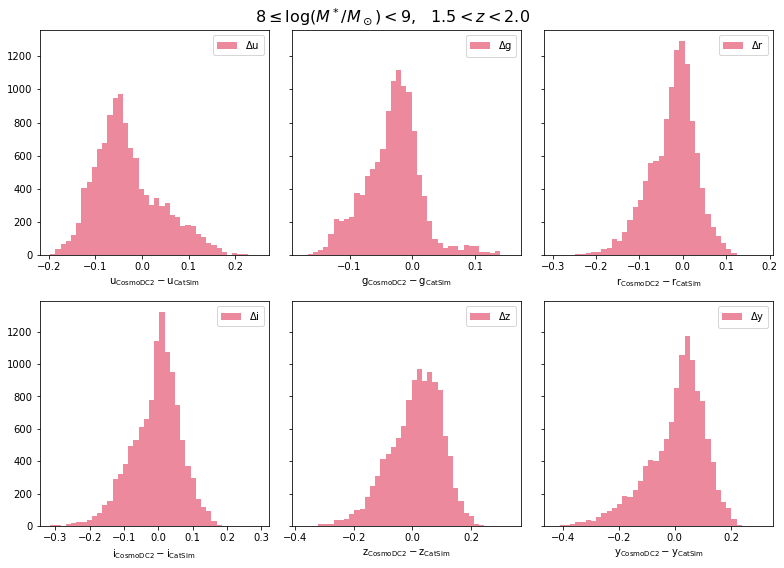

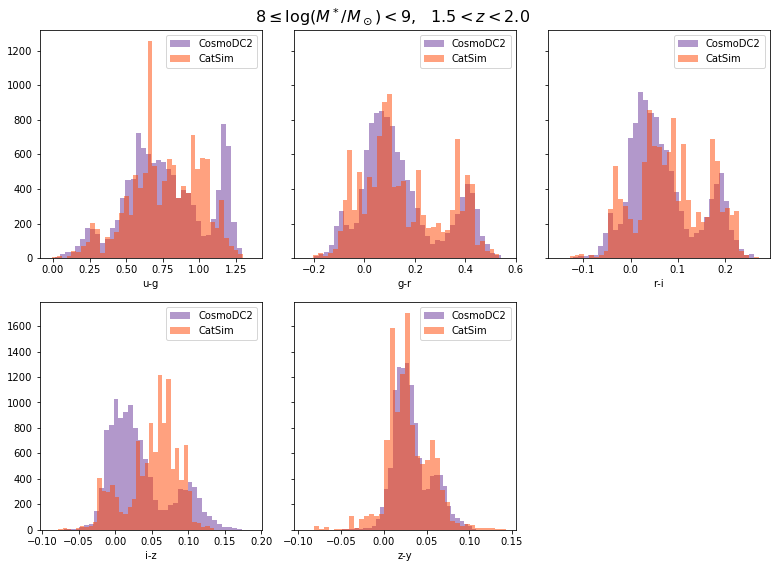

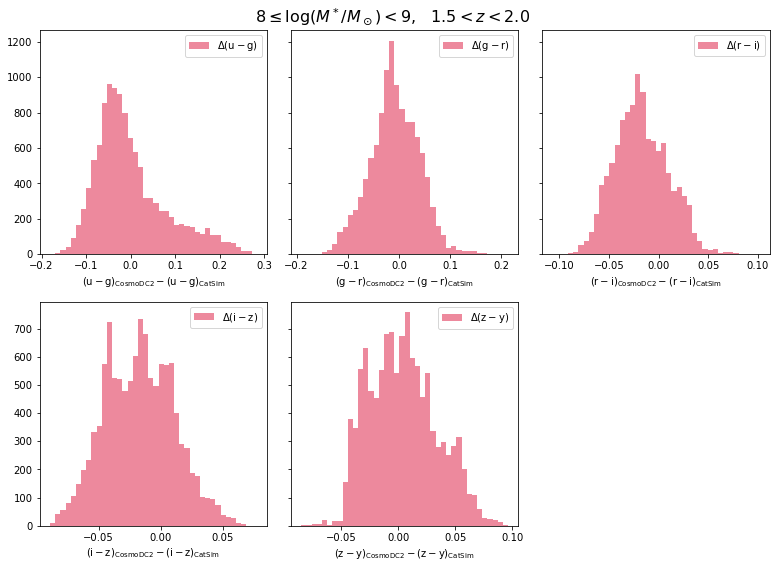

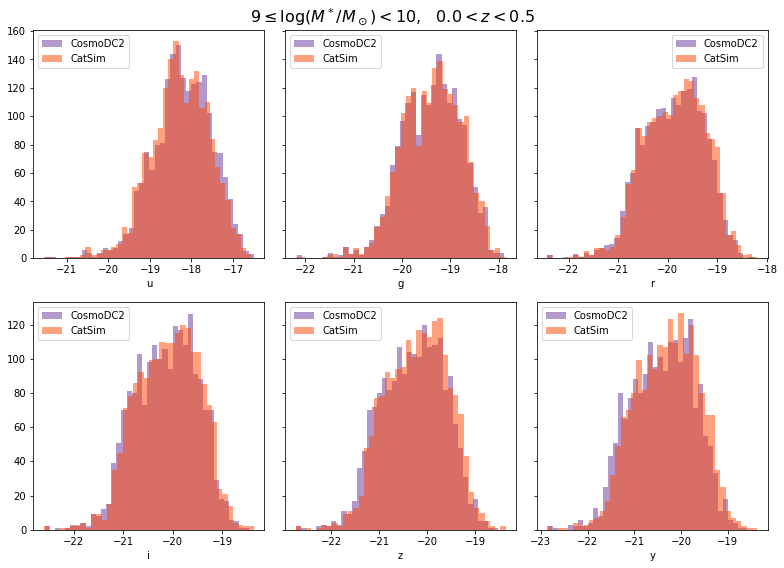

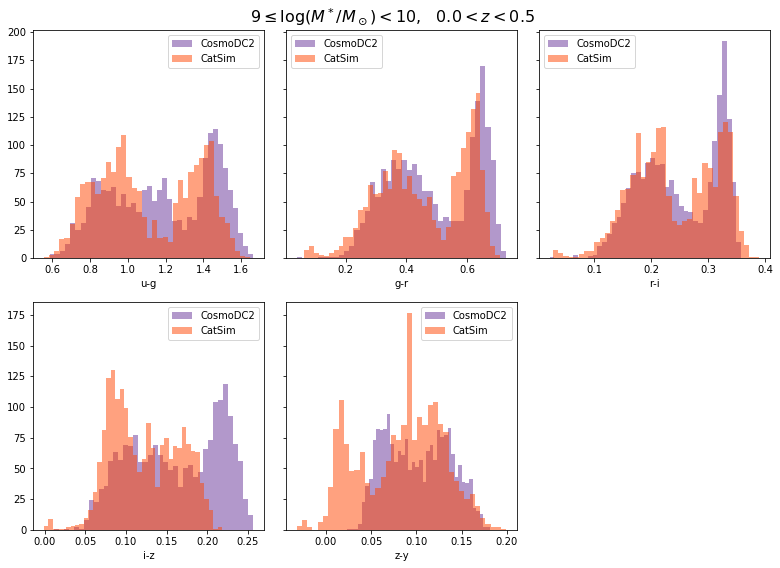

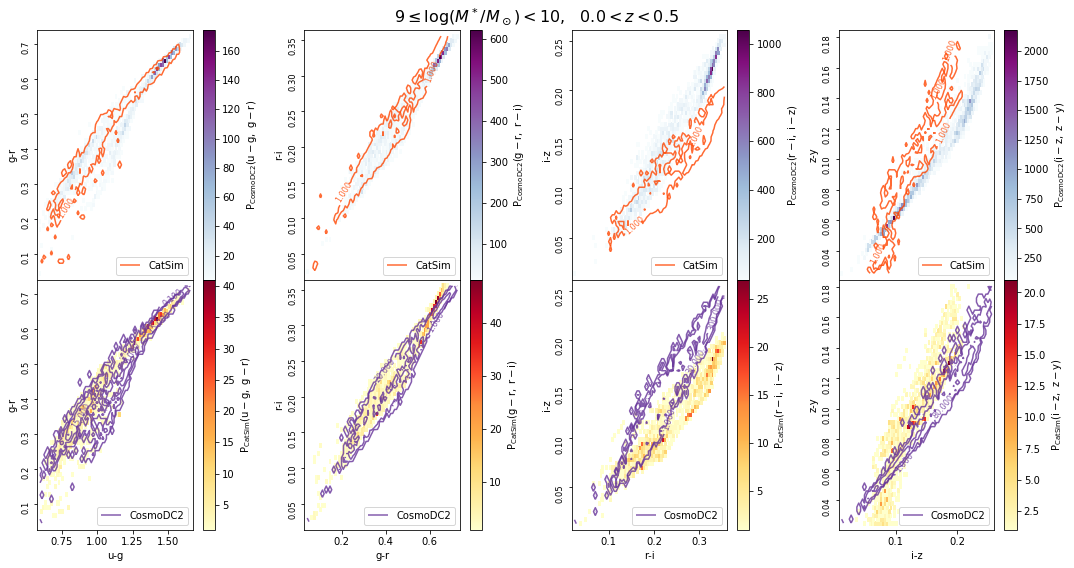

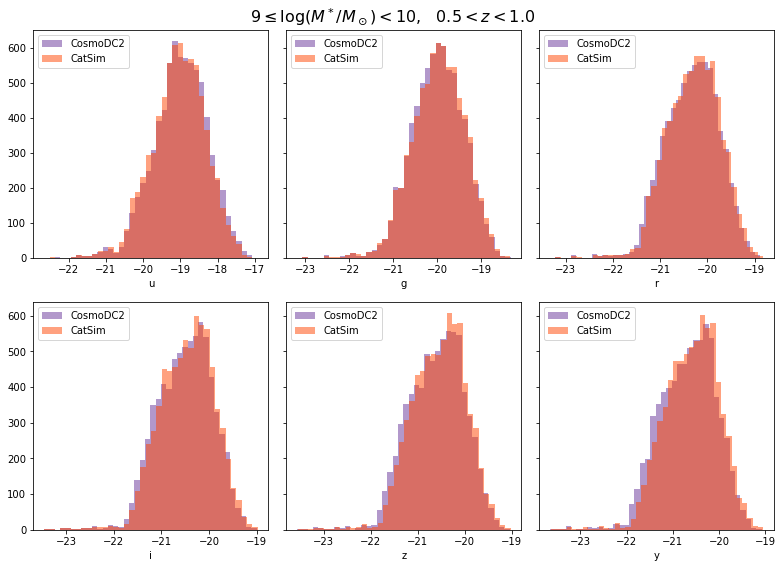

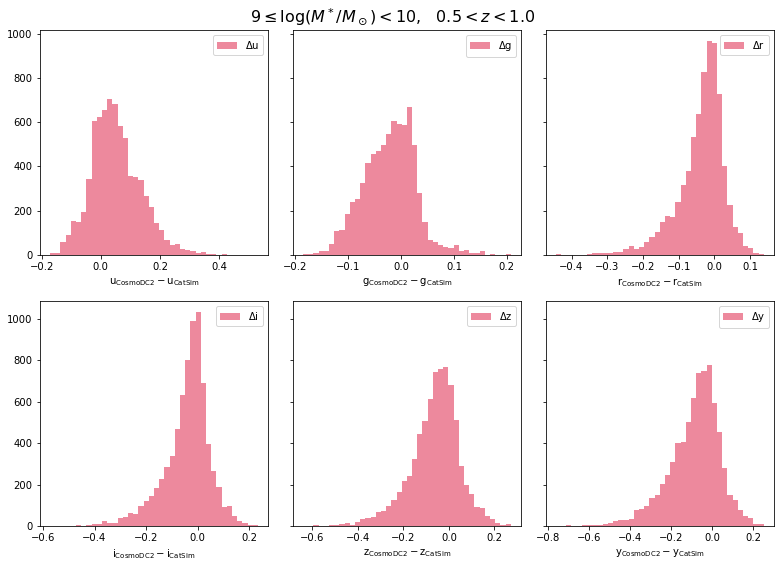

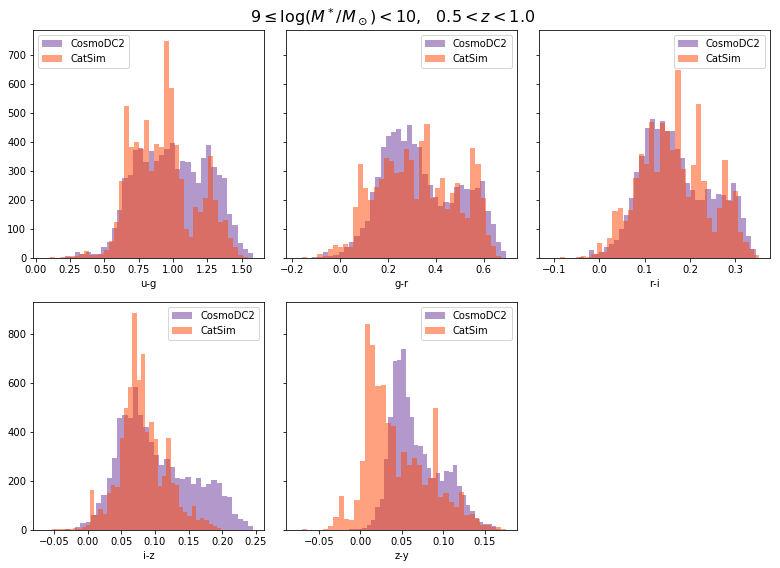

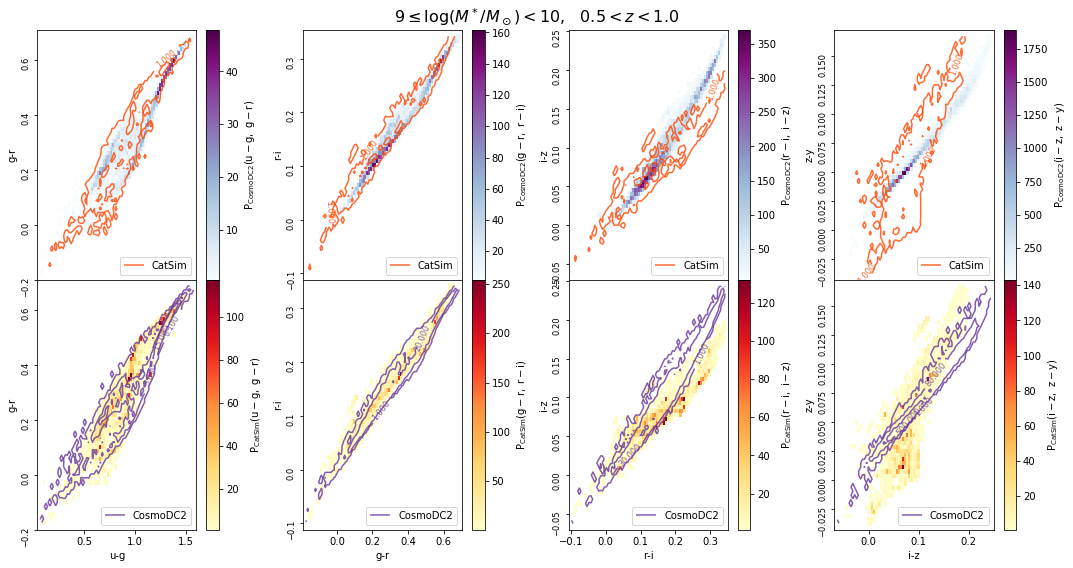

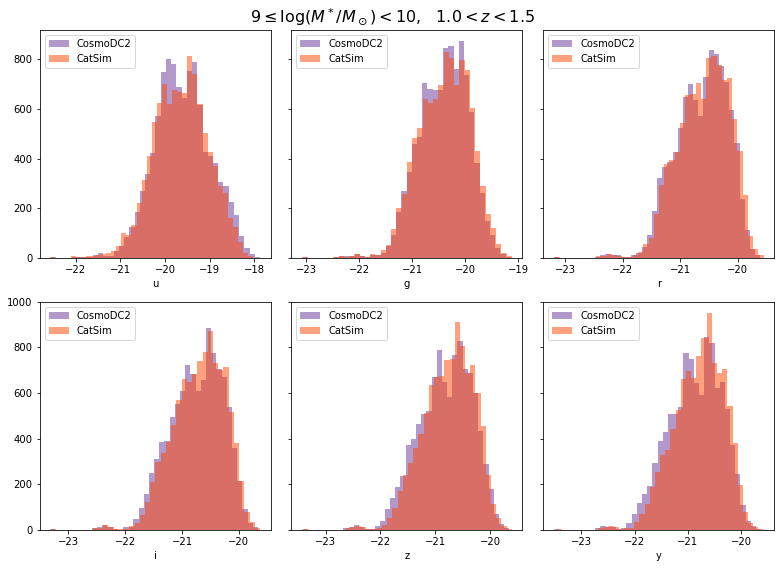

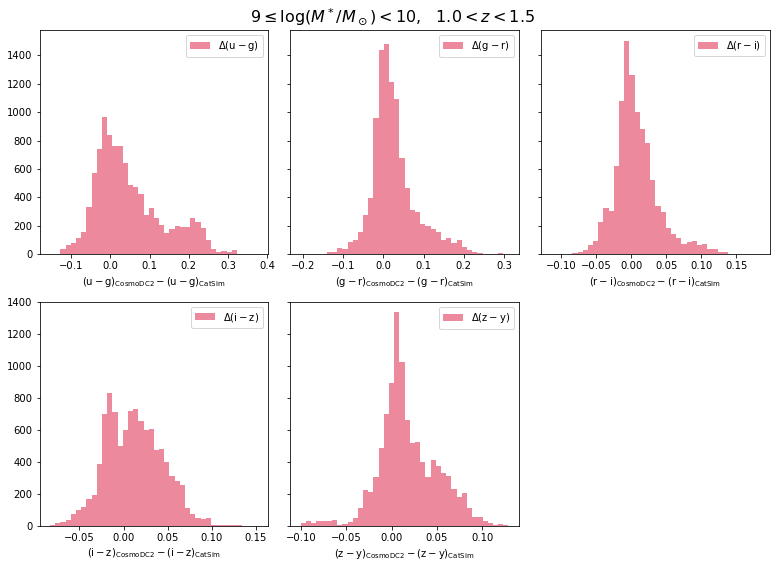

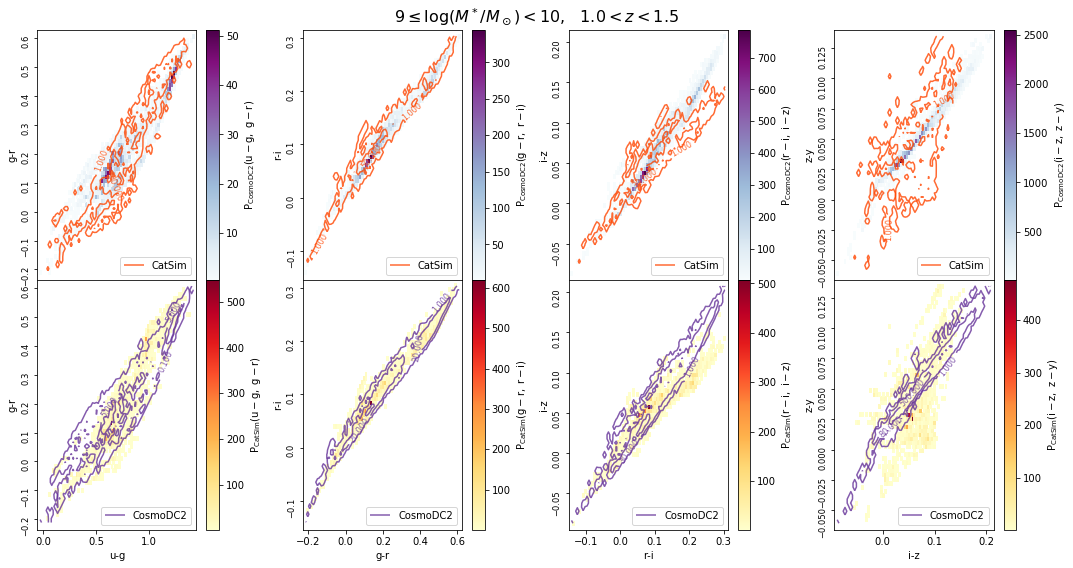

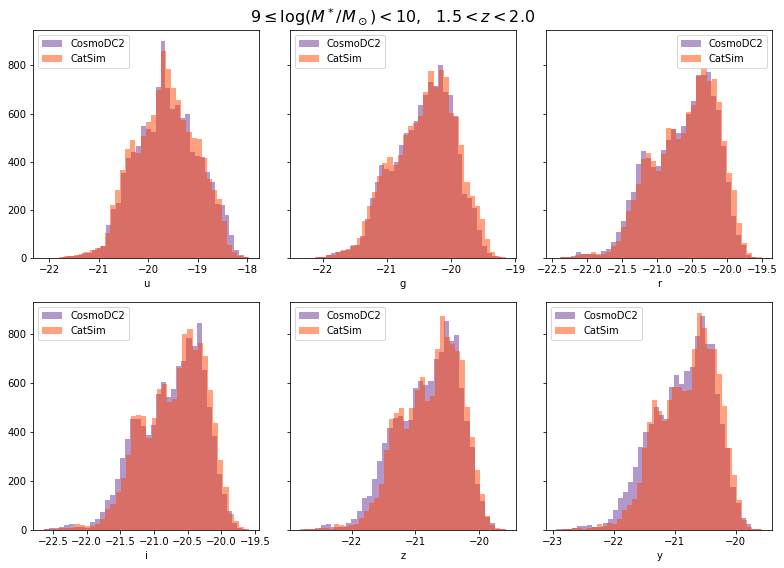

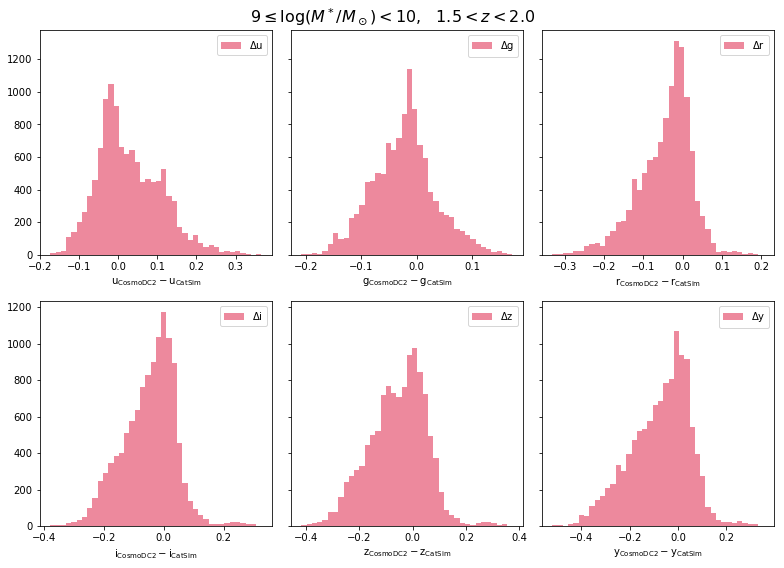

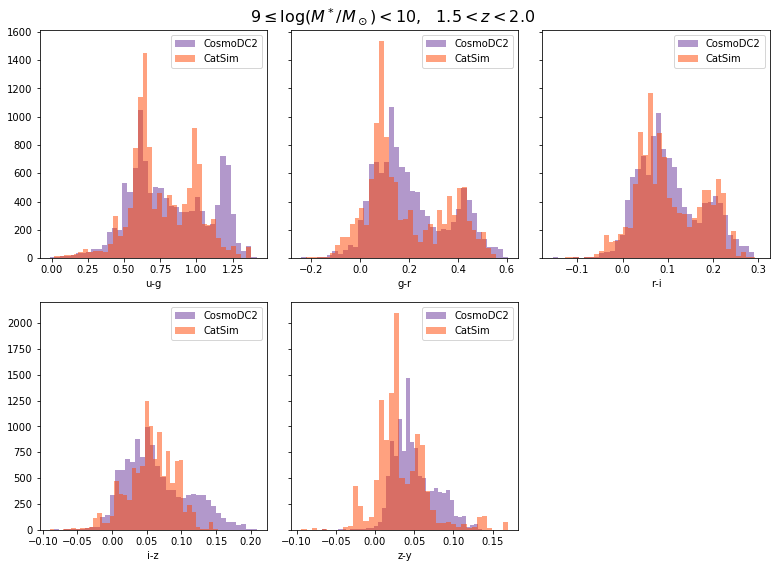

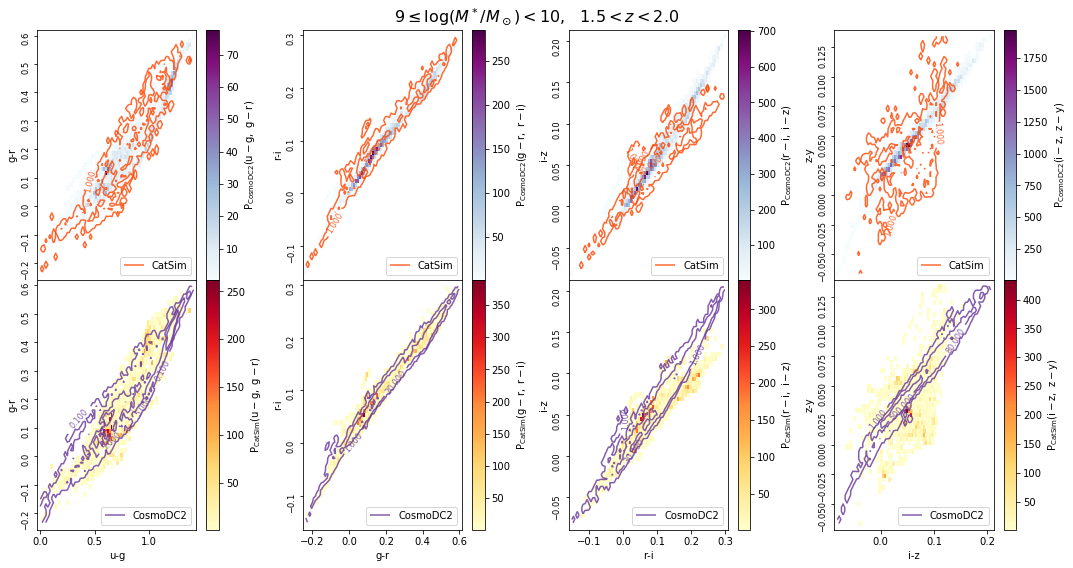

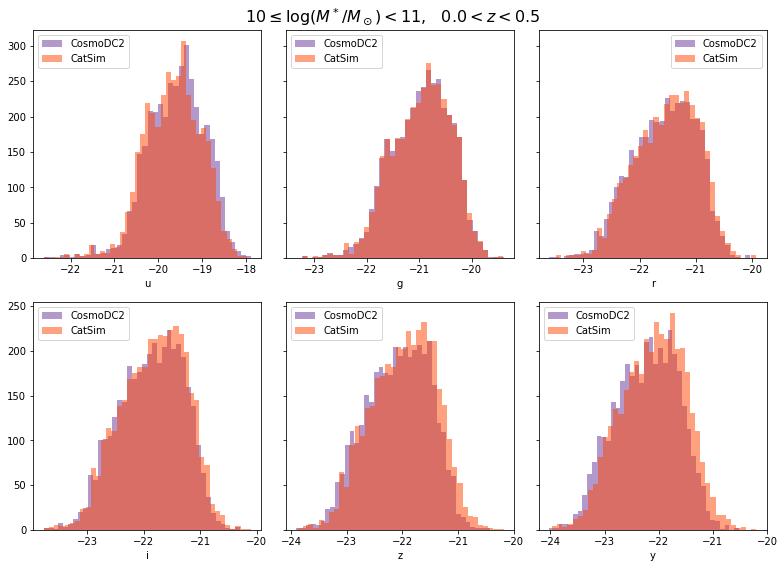

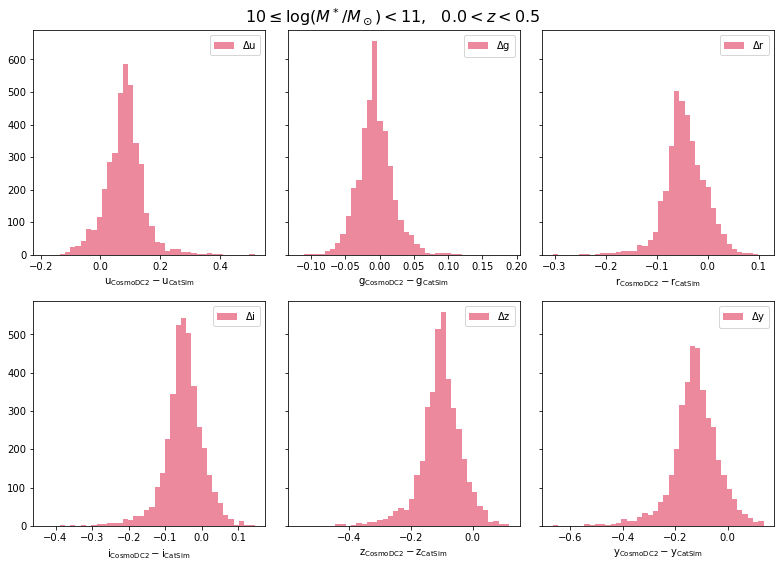

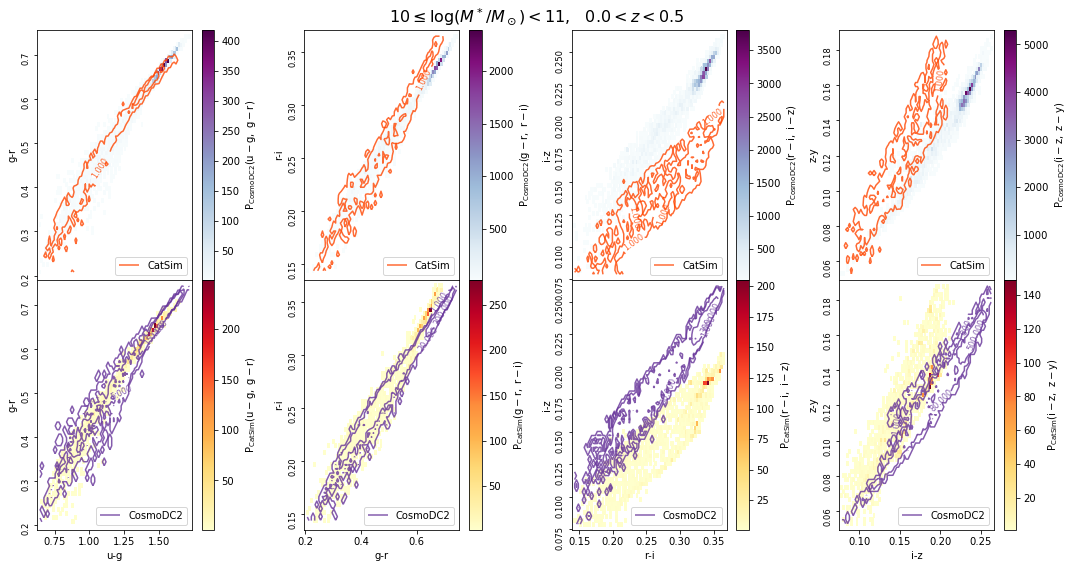

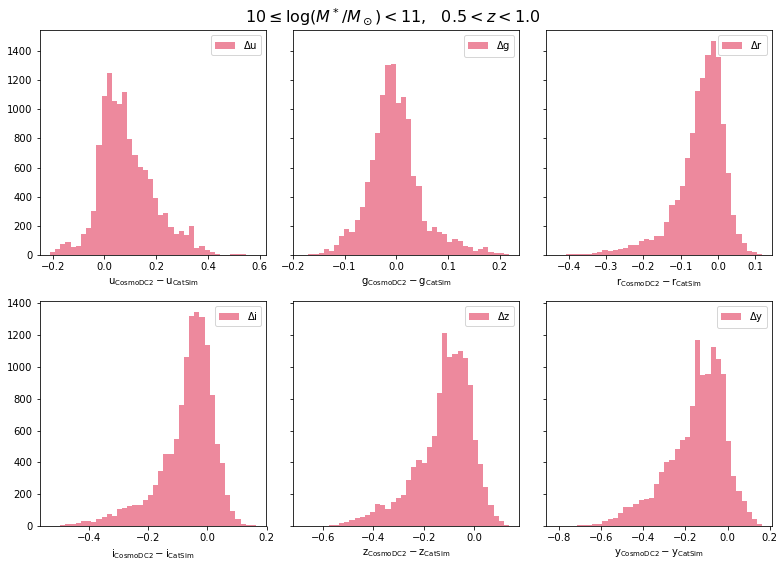

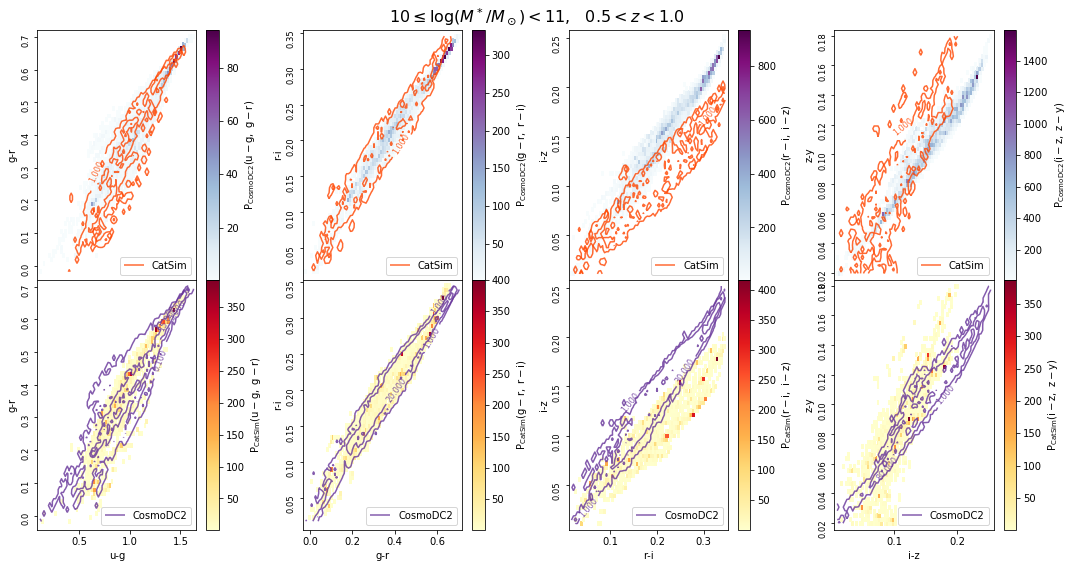

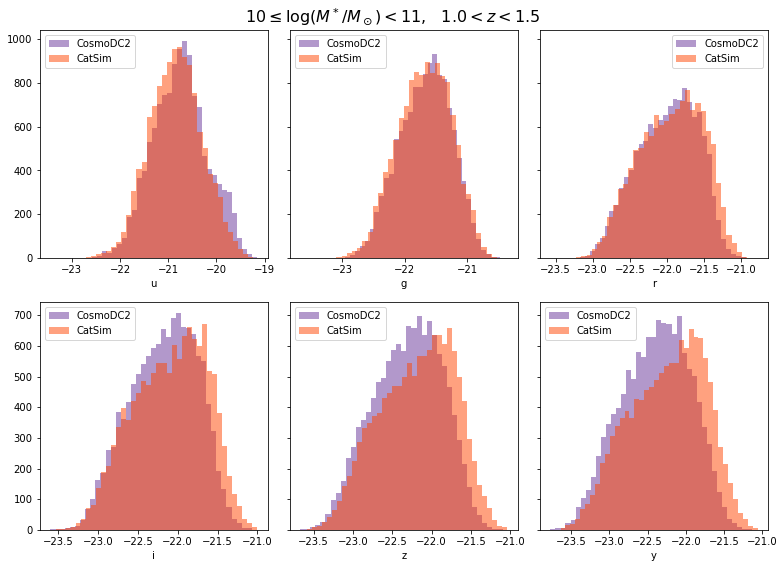

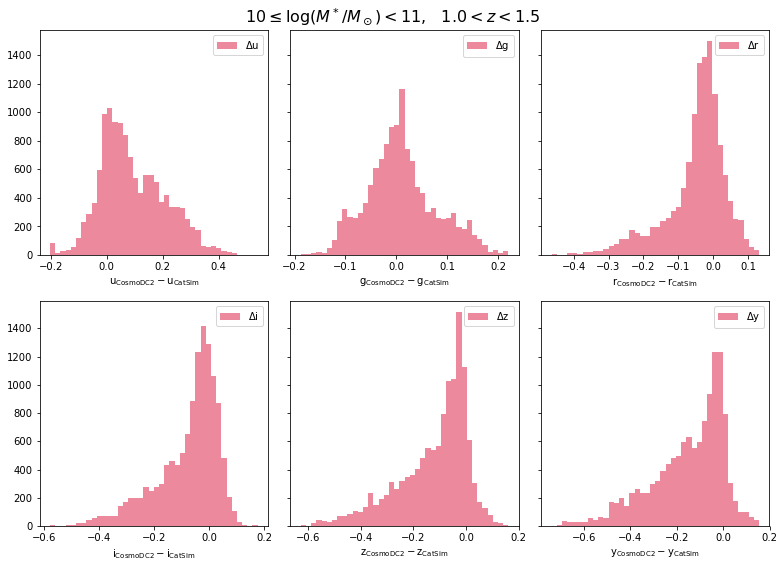

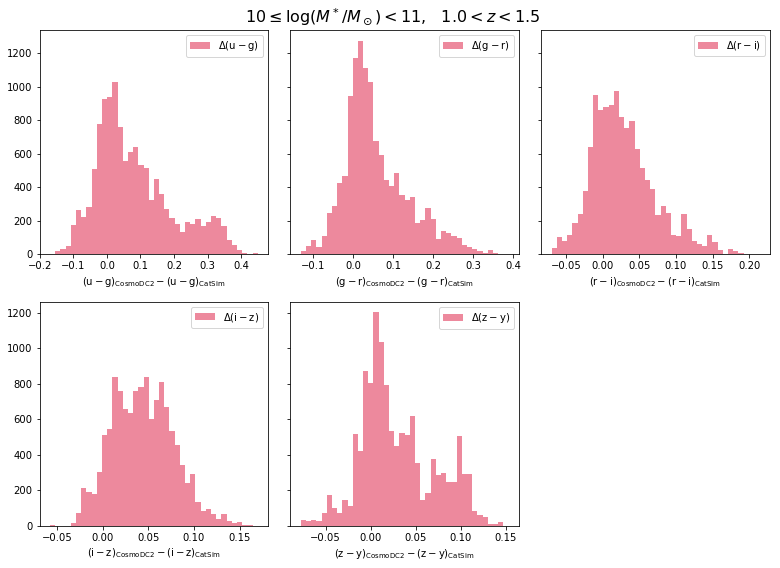

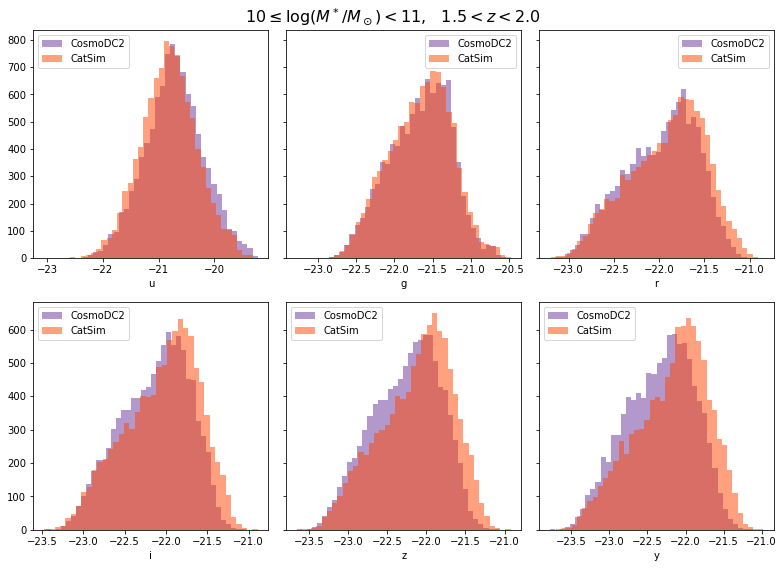

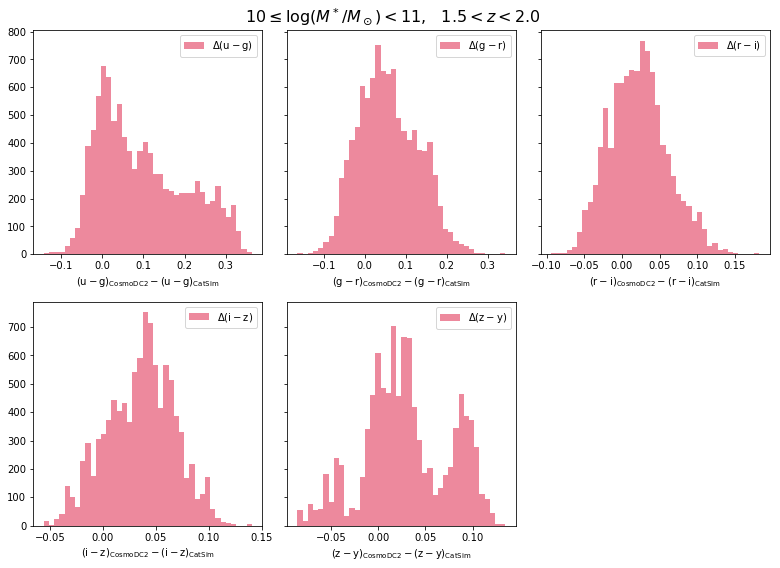

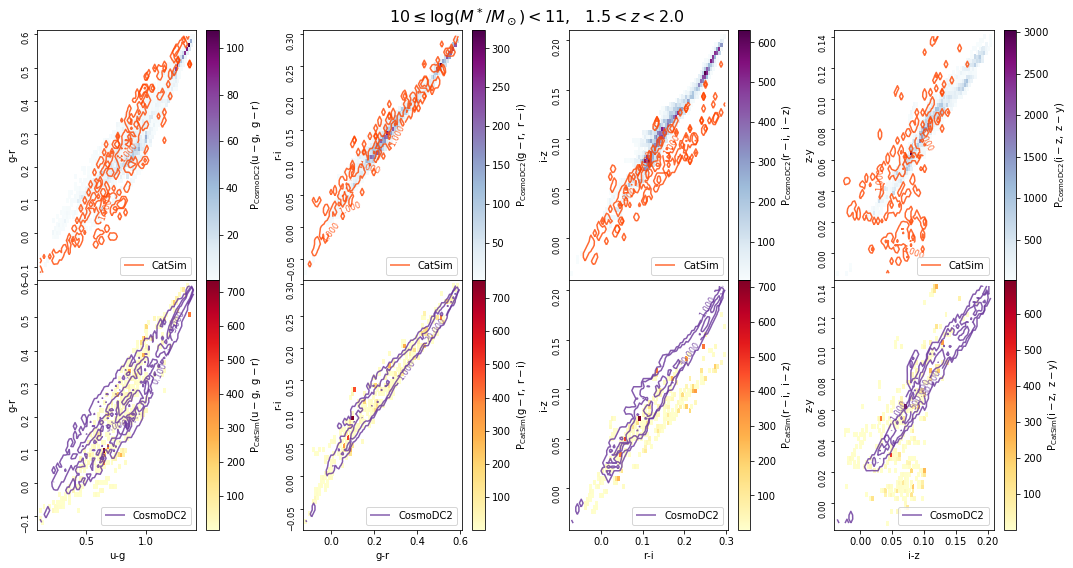

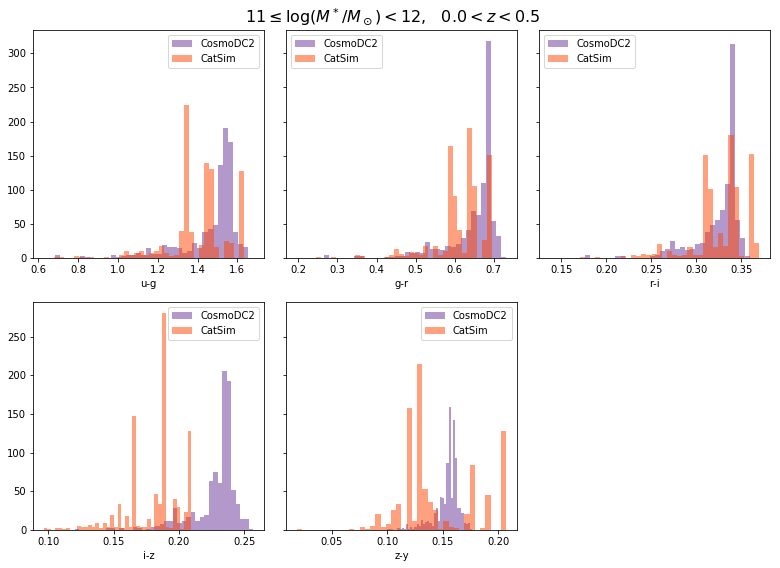

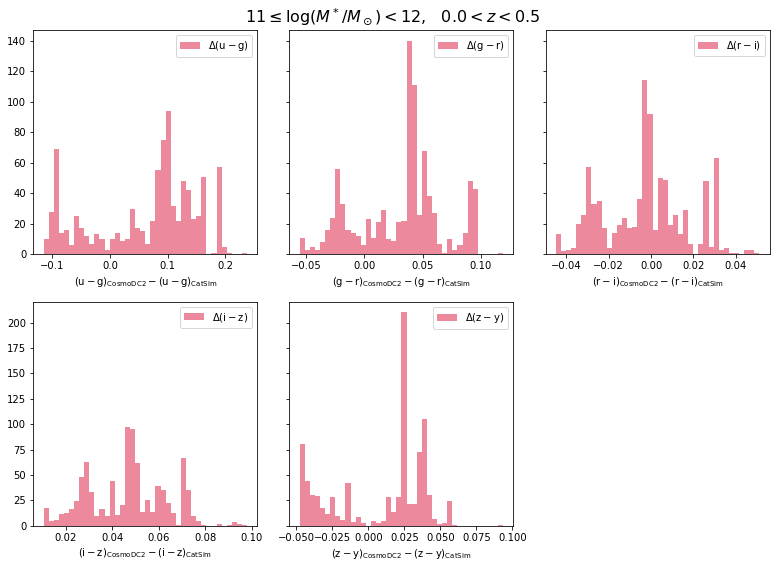

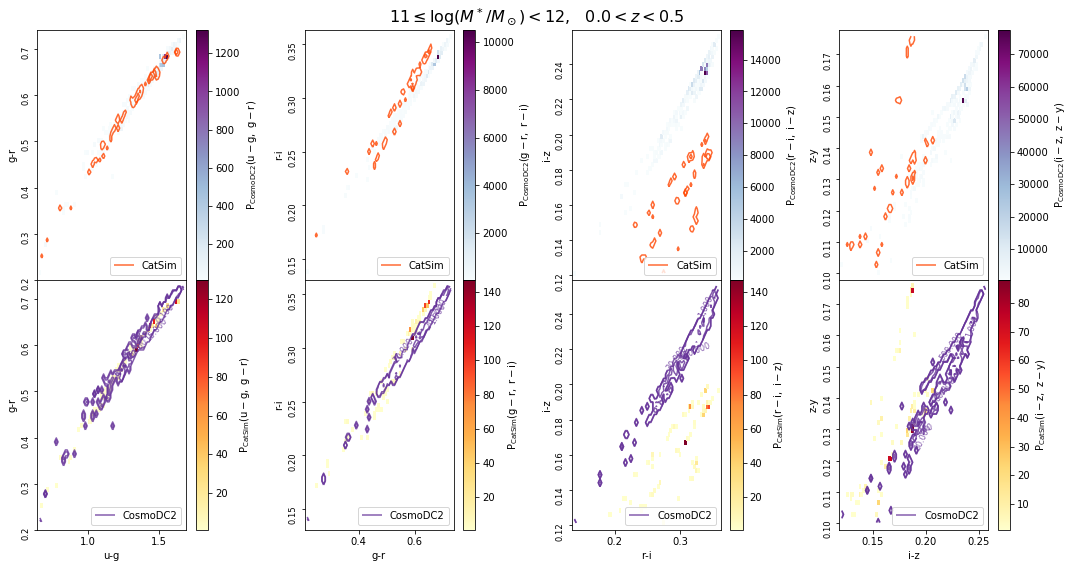

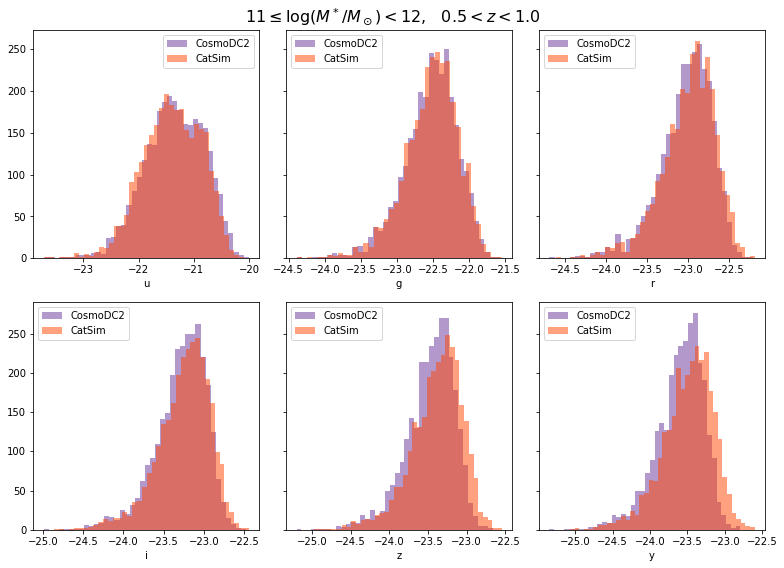

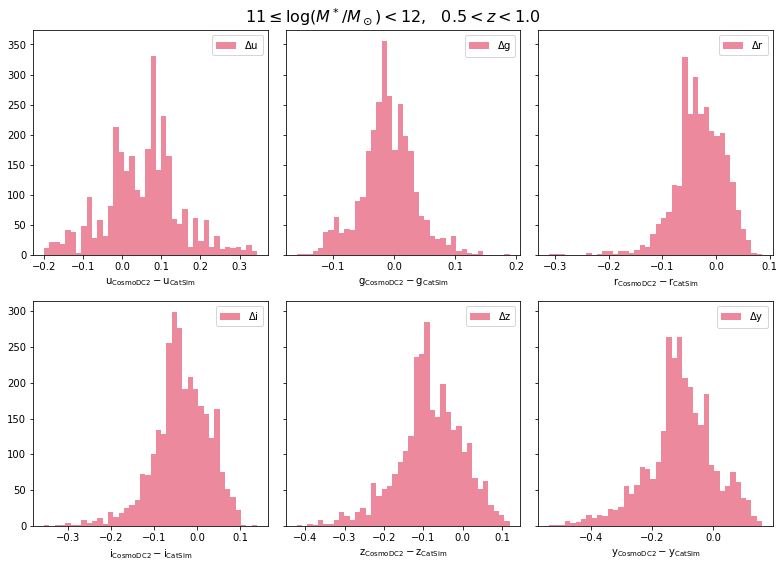

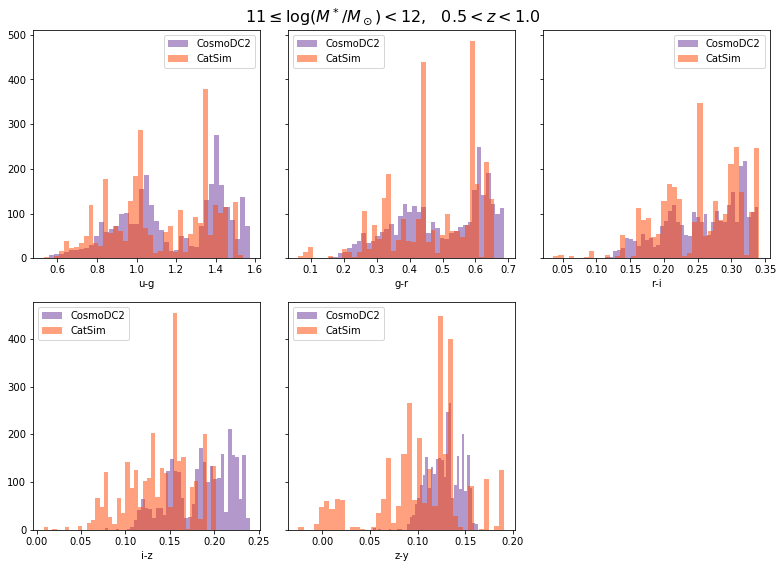

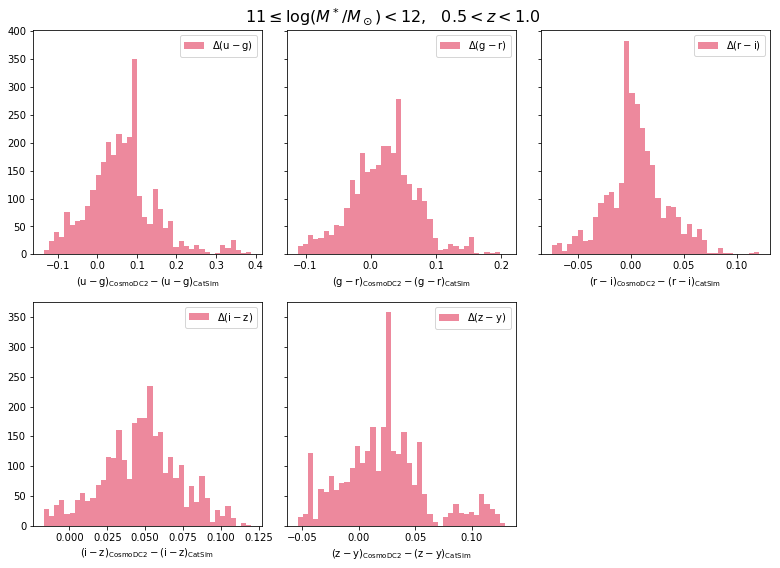

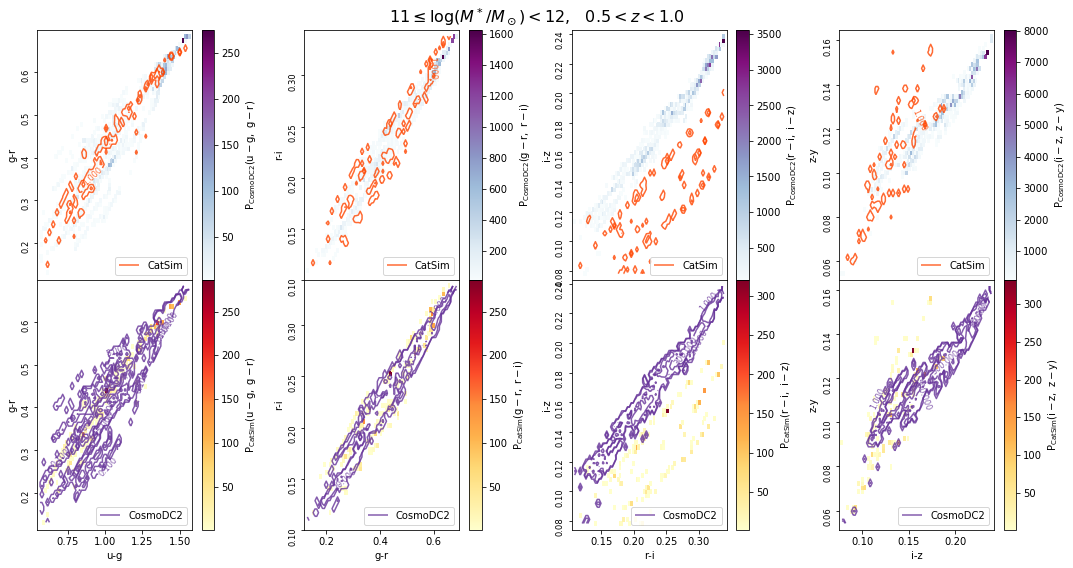

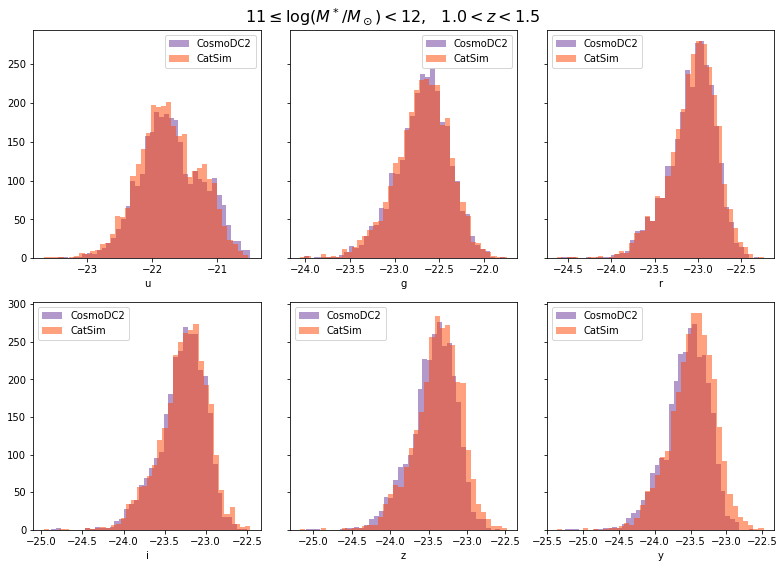

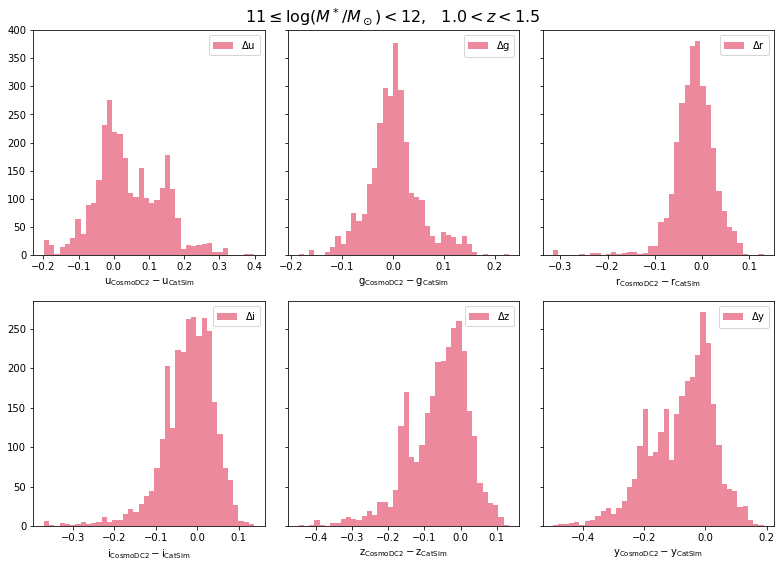

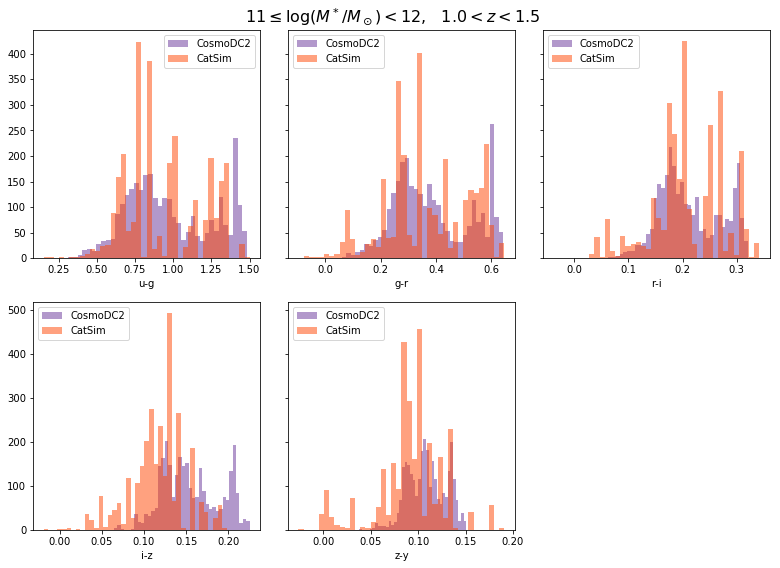

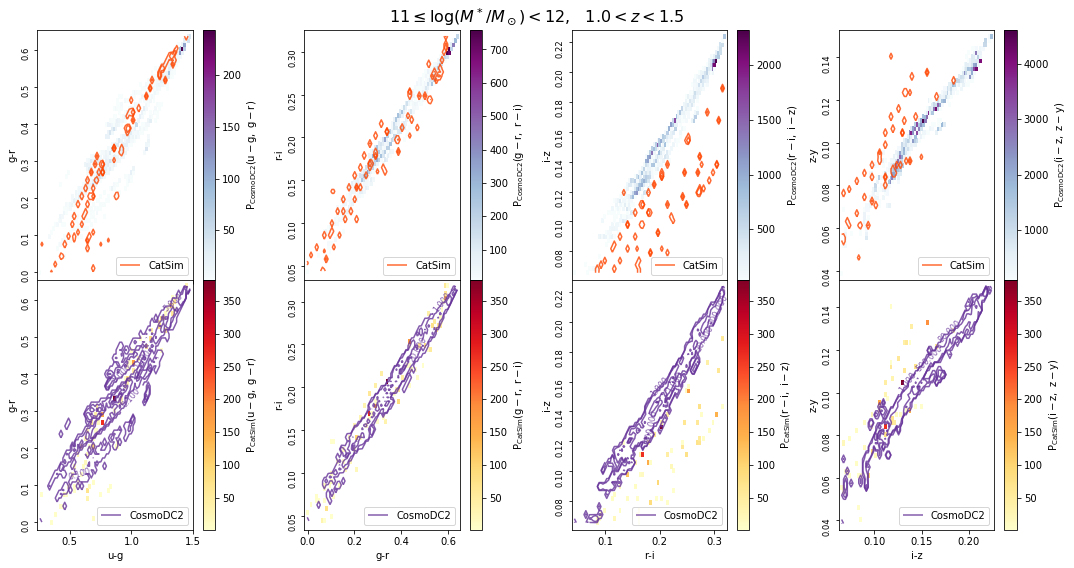

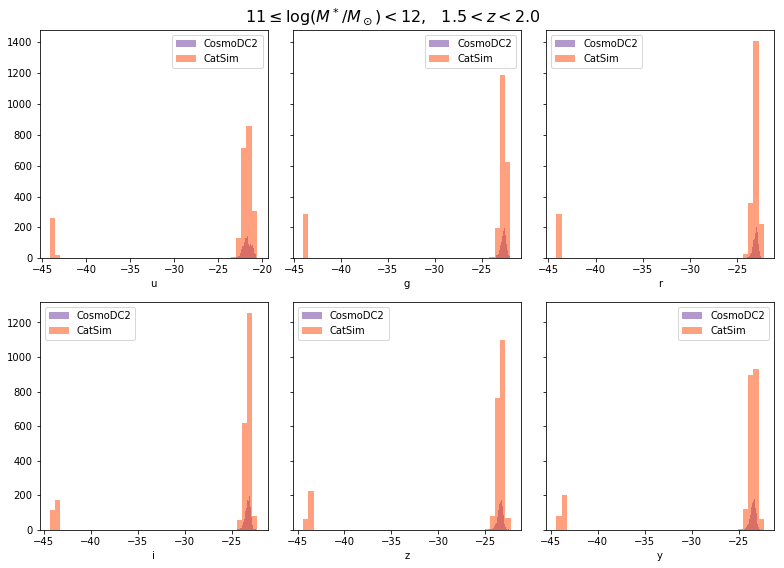

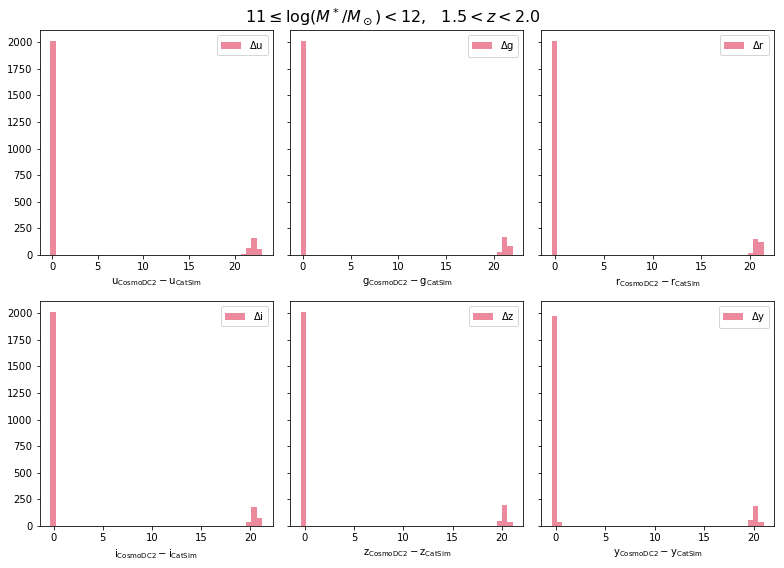

In [11]:
from itertools import zip_longest
zlos = [0.0, 0.5, 1.0, 1.5]
zhis = [0.5, 1.0, 1.5, 2.0]
logmass=[8, 9, 10, 11]
#logmass = [9, 10]
#zlos = [0.5, 1.0]
#zhis = [1.0, 1.5]
cd2_levels = [[.1, 5, 15], [1, 20, 200], [1, 30, 300], [1, 80, 500]]
cs_levels = [[1, 30, 300], [1, 50, 500], [1, 30, 300], [1, 80, 500]]
linewidths = np.asarray([.1, 1., 10])
Nbins = 40
Nxbins = 80
Nybins = 60
cd2_color = 'rebeccapurple'
cs_color = 'orangered'
diff_color = 'crimson'
cd2_map = 'BuPu'
cs_map = 'YlOrRd'
margin = 1.
alpha = 0.5
alpha2d = 0.5
alphactr = 0.8
colors = ['u-g', 'g-r', 'r-i', 'i-z', 'z-y']
for logm in logmass:
    gal_id = 'galaxy_id_{}'.format(str(logm))
    mtitle = '$ {} \leq \log(M^*/M_\odot) < {}$'.format(str(logm), str(logm + 1))
    mfig = 'logM_{}'.format(str(logm))
    sort_idx = cosmodc2['galaxy_id'].argsort()
    matches = sort_idx[np.searchsorted(cosmodc2['galaxy_id'], hf[gal_id].value, sorter = sort_idx)]
    print(len(matches), cosmodc2['galaxy_id'][matches[0:3]], hf[gal_id].value[0:3] )
    redshifts = cosmodc2['redshift'][matches]    
    for zlo, zhi in zip(zlos, zhis):
        ztitle = '$ {:.1f} < z < {:.1f}$'.format(zlo, zhi)
        zfig = 'z_{:.1f}_{:.1f}'.format(zlo, zhi)
        maskz = (redshifts > zlo) & (redshifts < zhi)
        print('# in z bin = {}'.format(np.count_nonzero(maskz)))
        #print(np.min(redshifts[maskz]), np.max(redshifts[maskz]))
        fig, ax_all = plt.subplots(2, 3, figsize=(11, 8), sharey='row')
        for band, ax in zip(bands, ax_all.flat):
            cd2_key = cosmodc2_Mtemplate.format(band)
            catsim_mags = catsim[str(logm)][band]- cosmodc2['distmod'].value[matches] #correct for added distance modulus
            ax.hist(cosmodc2[cd2_key][matches][maskz], bins=Nbins, color=cd2_color, label='CosmoDC2', alpha=alpha)
            ax.hist(catsim_mags[maskz], bins=Nbins, color=cs_color, label='CatSim', alpha=alpha)
            ax.legend(loc='best')
            ax.set_xlabel('{}'.format(band))
            fig.suptitle('{},   {}'.format(mtitle, ztitle), size=16)
            fig.tight_layout()
            fig.subplots_adjust(top=0.94)
            
        figname = 'mag_check_{}_{}.png'.format(mfig, zfig)
        print('Saving {}'.format(figname))
        fig.savefig(figname, bbox_inches='tight')
        
        fig, ax_all = plt.subplots(2, 3, figsize=(11, 8), sharey='row')
        for band, ax in zip(bands, ax_all.flat):
            cd2_key = cosmodc2_Mtemplate.format(band)
            catsim_mags = catsim[str(logm)][band]- cosmodc2['distmod'].value[matches] #correct for added distance modulus
            label = '$\Delta \\rm{{ {} }}$'.format(band)
            ax.hist(cosmodc2[cd2_key][matches][maskz] - catsim_mags[maskz], bins=Nbins, color=diff_color, label=label, alpha=alpha)
            ax.legend(loc='best')
            ax.set_xlabel('$\\rm {}_{} - \\rm {}_{}$'.format(band,'{\\rm{CosmoDC2}}', band, '{\\rm{CatSim}}'))
            fig.suptitle('{},   {}'.format(mtitle, ztitle), size=16)
            fig.tight_layout()
            fig.subplots_adjust(top=0.94)
            
        figname = 'delta_mag_{}_{}.png'.format(mfig, zfig)
        print('Saving {}'.format(figname))
        fig.savefig(figname, bbox_inches='tight')
        
        fig, ax_all = plt.subplots(2, 3, figsize=(11, 8), sharey='row')
        for color, ax in zip_longest(colors, ax_all.flat):
            if color is None:
                ax.set_visible(False)
            else:
                ax.hist(cosmodc2[color][matches][maskz], bins=Nbins, color=cd2_color,label='CosmoDC2', alpha=alpha)
                ax.hist(catsim[str(logm)][color][maskz], bins=int(Nbins), color=cs_color,label='CatSim', alpha=alpha)
                ax.legend(loc='best')
                ax.set_xlabel('{}'.format(color))
                fig.suptitle('{},   {}'.format(mtitle, ztitle), size=16)
                fig.tight_layout()
                fig.subplots_adjust(top=0.94)
            
        figname = 'color_check_{}_{}.png'.format(mfig, zfig)
        print('Saving {}'.format(figname))
        fig.savefig(figname, bbox_inches='tight')
        
        fig, ax_all = plt.subplots(2, 3, figsize=(11, 8), sharey='row')
        for color, ax in zip_longest(colors, ax_all.flat):
            if color is None:
                ax.set_visible(False)
            else:
                label = '$\Delta \\rm{{({})}}$'.format(color)
                ax.hist(cosmodc2[color][matches][maskz] - catsim[str(logm)][color][maskz], bins=Nbins, 
                        color=diff_color,label=label, alpha=alpha)
                ax.legend(loc='best')
                ax.set_xlabel('{}'.format(color))
                ax.set_xlabel('$\\rm{{ ({})_{{CosmoDC2}} - ({})_{{CatSim}} }}$'.format(color, color))
                fig.suptitle('{},   {}'.format(mtitle, ztitle), size=16)
                fig.tight_layout()
                fig.subplots_adjust(top=0.94)
            
        figname = 'delta_color_{}_{}.png'.format(mfig, zfig)
        print('Saving {}'.format(figname))
        fig.savefig(figname, bbox_inches='tight')
        
        colx = colors[0:-1]
        coly = colors[1:]
        fig, ax_all = plt.subplots(2, 4, figsize=(15, 8), sharex='col')
        for n, (cx, cy, cslevel, cd2level) in enumerate(zip(colx, coly, cs_levels, cd2_levels)):
            ax = ax_all.flat[n] #top row
            ax4 = ax_all.flat[n+4] #bottom row
            #cosmodc2
            CD2, xedges, yedges = np.histogram2d(cosmodc2[cx][matches][maskz], 
                                    cosmodc2[cy][matches][maskz],
                                    bins=(Nxbins, Nybins), normed=True)
            #print(xedges, yedges)
            x_cen, y_cen = np.meshgrid(xedges[:-1], yedges[:-1])
            x_cen += (0.5*(xedges[1]-xedges[0]))  #find bin centers
            y_cen += (0.5*(yedges[1]-yedges[0]))
            x_wid = xedges[1] - xedges[0]
            y_wid = yedges[1] - yedges[0]
            #catsim
            CS, xedges, yedges = np.histogram2d(catsim[str(logm)][cx][maskz], 
                                               catsim[str(logm)][cy][maskz],
                                               bins=(xedges, yedges))
            #plot CatSim contours with cosmoDC2 density, CosmoDC2 contours with Catsim density
            #catsim density
            CSmasked = np.ma.masked_where(CS.T==0.0, CS.T)
            hs = ax4.pcolormesh(xedges, yedges, CSmasked, cmap=cs_map)#, alpha=alpha2d)          
            cbs = plt.colorbar(hs, ax=ax4)
            rlabelcs = '$\\rm{{P_{{CatSim}}({},\ {})}}$'.format(cx, cy)
            #rectcs = mpatches.Patch(label=rlabelcs, color=cs_color, alpha=0.5)
            cbs.set_label(rlabelcs)
            
            #cosmoDC2 2-d probability density
            CD2masked = np.ma.masked_where(CD2.T==0.0, CD2.T)
            hd2 = ax.pcolormesh(xedges, yedges, CD2masked, cmap=cd2_map)#, alpha=alpha2d)
            #extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
            #hd2 = ax.imshow(CD2masked, cmap=cd2_map, extent=extent, alpha=alpha2d)
            cb2 = plt.colorbar(hd2, ax=ax)
            rlabeld2 = '$\\rm{{P_{{CosmoDC2}}({},\ {})}}$'.format(cx, cy)
            #rectd2 = mpatches.Patch(label=rlabeld2, color=cd2_color, alpha=0.5)
            cb2.set_label(rlabeld2)
            
            #catsim contours
            cnt2= ax.contour(x_cen, y_cen, CS.T, colors=cs_color, 
                             levels=cslevel, linewidth=linewidths, alpha=alphactr)
            ax.clabel(cnt2, inline=1, fontsize=8)
            cnt2.collections[0].set_label('CatSim')
            
            #plot cosmoDC2 contours
            cnt1 = ax4.contour(x_cen, y_cen, CD2.T, colors=cd2_color, 
                              levels=cd2level, linewidth=linewidths, alpha=alphactr)
            ax4.clabel(cnt1, inline=1, fontsize=8)
            cnt1.collections[0].set_label('CosmoDC2')
            
            for axx in [ax, ax4]:
                axx.set_xlim(np.min(xedges) - margin*x_wid, np.max(xedges) + margin*x_wid)
                axx.set_ylim(np.min(yedges) - margin*x_wid, np.max(yedges) + margin*y_wid)
                for tick in axx.yaxis.get_major_ticks():
                    tick.label.set_fontsize('small') 
                    tick.label.set_rotation('vertical')
                axx.legend(loc='lower right')
                axx.set_xlabel('{}'.format(cx))
                axx.set_ylabel('{}'.format(cy))
                
            fig.suptitle('{},   {}'.format(mtitle, ztitle), size=16)
            fig.tight_layout()
            fig.subplots_adjust(hspace=0)
            fig.subplots_adjust(top=0.94)
            
        figname = 'color_color_check_{}_{}.png'.format(mfig, zfig)
        print('Saving {}'.format(figname))
        fig.savefig(figname, bbox_inches='tight')
        